# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The goal of the used car dealership is to determine which features have the highest positive correlation towards used car prices.  We are also tasked with determining a model that can predict a used car price by these features.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [101]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

1. Read in the data
2. Examine columns of the data to see what columns there are and if any contain categorical features or NANs
3. Understand the shape of the data 
4. Remove rows with column values that are NANs
5. Visualize the data

Step 1: Read in the data

In [14]:
vehicles = pd.read_csv('data/vehicles.csv')



Step 2: Examine columns of the data for NANs and categorical features

In [15]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [ ]:
Step 3: Understand the shape of the data

In [16]:
vehicles.shape

(426880, 18)

In [113]:
vehicles_cleansed = vehicles.dropna()

In [114]:
vehicles_cleansed.shape

(34868, 18)

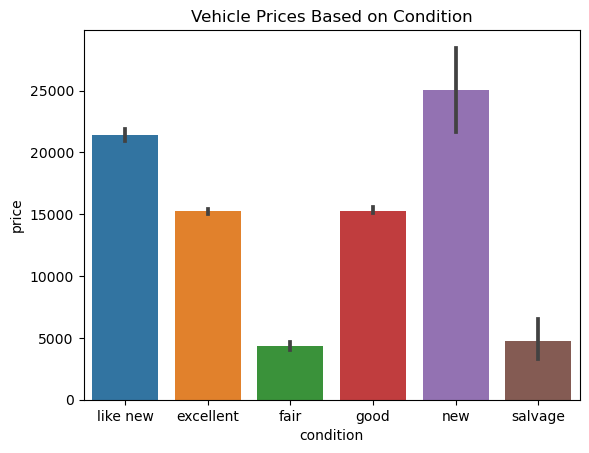

In [133]:
chart = sns.barplot(x='condition', y='price', data=vehicles_cleansed).set(title='Vehicle Prices Based on Condition')

Text(0.5, 1.0, 'Vehicle Prices Based on Engine Size')

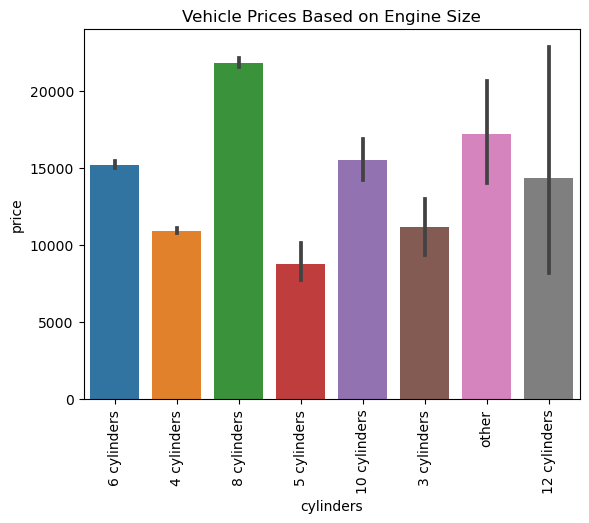

In [135]:
chart = sns.barplot(x='cylinders', y='price', data=vehicles_cleansed)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
chart.set_title("Vehicle Prices Based on Engine Size")

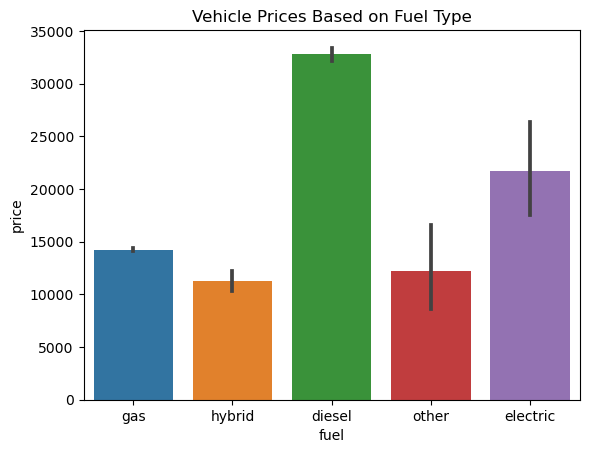

In [136]:
chart = sns.barplot(x='fuel', y='price', data=vehicles_cleansed).set(title='Vehicle Prices Based on Fuel Type')

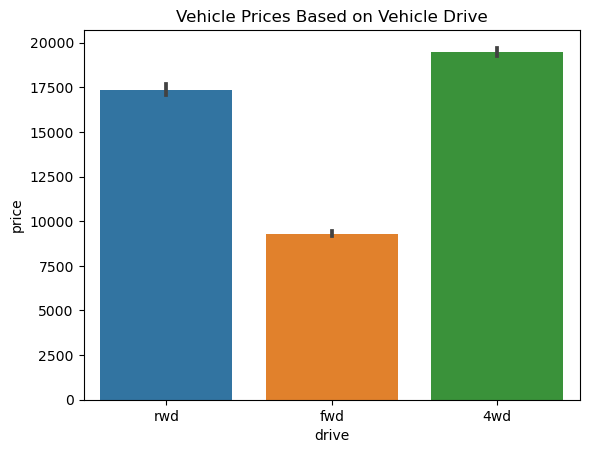

In [137]:
chart = sns.barplot(x='drive', y='price', data=vehicles_cleansed).set(title='Vehicle Prices Based on Vehicle Drive')

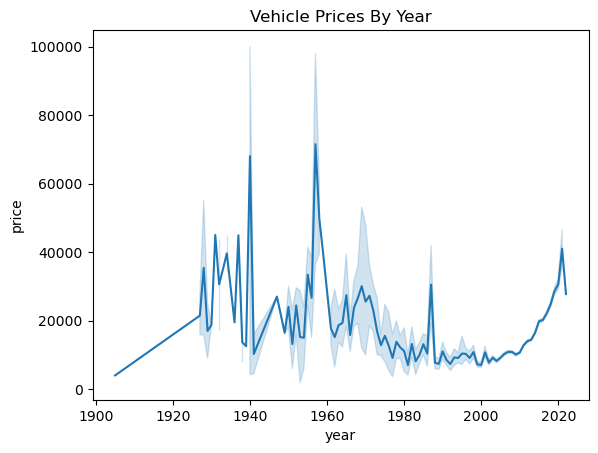

In [138]:
chart = sns.lineplot(x='year',y='price', data=vehicles_cleansed).set(title='Vehicle Prices By Year')

In [118]:
#Create a dataframe that only contains the numeric features
vehicles_numeric = vehicles_cleansed[['odometer','year','price']]

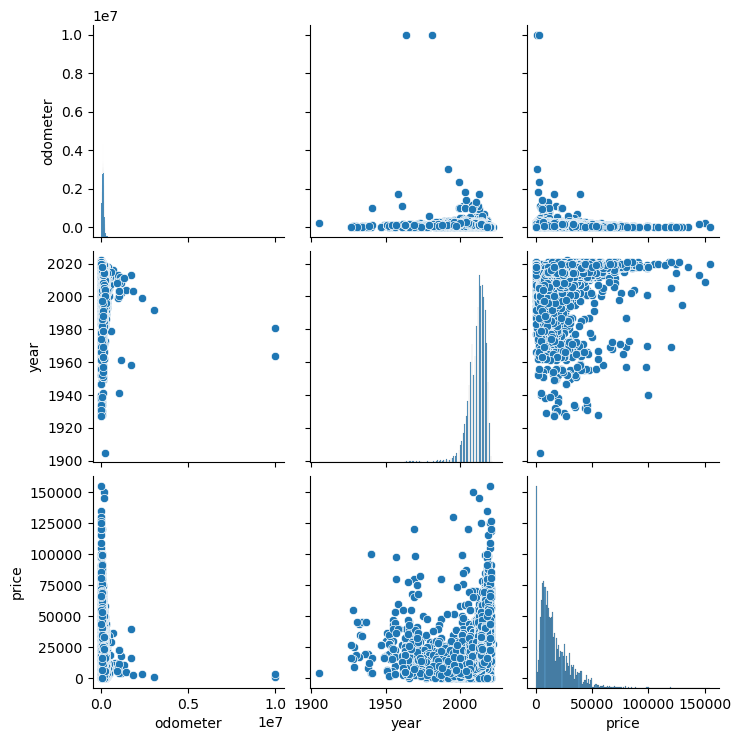

In [140]:
#Examine pairplot of numeric features to see if there are any obvious correlations
sns.pairplot(vehicles_numeric)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Drop columns that will not be pertinent to predictions such as VIN & ID (These are identifier columns)

In [19]:
#VIN is dropped because it is an identifier and not pertinent to the analysis
vehicles_cleansed = vehicles_cleansed.drop('VIN', axis = 1)

In [20]:
#id is dropped because it is an identifier and not pertinent to the analysis
vehicles_cleansed = vehicles_cleansed.drop('id', axis = 1)

In [10]:
#confirm data looks as expected
vehicles_cleansed.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al


Try to understand which columns are categorical or not... and for the ones that are categorical understand if there is a reasonable number of categories

In [10]:
n = len(pd.unique(vehicles_cleansed['model']))
print(n)

5139


In [21]:
#drop model
vehicles_cleansed = vehicles_cleansed.drop('model', axis = 1) 


In [22]:
n = len(pd.unique(vehicles_cleansed['manufacturer']))
print(n)

41


In [23]:
n = len(pd.unique(vehicles_cleansed['condition']))
print(n)

6


In [24]:
n = len(pd.unique(vehicles_cleansed['cylinders']))
print(n)

8


In [25]:
n = len(pd.unique(vehicles_cleansed['fuel']))
print(n)

5


In [26]:
n = len(pd.unique(vehicles_cleansed['title_status']))
print(n)

6


In [27]:
n = len(pd.unique(vehicles_cleansed['transmission']))
print(n)

3


In [28]:
n = len(pd.unique(vehicles_cleansed['drive']))
print(n)

3


In [29]:
n = len(pd.unique(vehicles_cleansed['size']))
print(n)

4


In [30]:
n = len(pd.unique(vehicles_cleansed['type']))
print(n)

13


In [32]:
n = len(pd.unique(vehicles_cleansed['paint_color']))
print(n)

12


In [33]:
n = len(pd.unique(vehicles_cleansed['state']))
print(n)

51


In [34]:
vehicles_cleansed = vehicles_cleansed.drop('state', axis = 1)

In [35]:
n = len(pd.unique(vehicles_cleansed['region']))
print(n)

392


In [36]:
#drop region 
vehicles_cleansed = vehicles_cleansed.drop('region', axis = 1)

In [37]:
vehicles_cleansed.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
126,0,2018.0,chevrolet,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white
127,0,2019.0,chevrolet,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white
128,0,2018.0,chevrolet,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white
215,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue
219,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white


Encode categorical columns

In [38]:
categorical_columns = ["manufacturer","condition", "cylinders", "fuel", "title_status", "transmission","drive","size","type","paint_color"]

#categorical_columns = ["region", "manufacturer", "model"]
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), categorical_columns),
    remainder='passthrough')



In [39]:
transformed = transformer.fit_transform(vehicles_cleansed)


In [40]:
transformed.shape

(34868, 104)

In [41]:
vehicles_encoded = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())


In [42]:
vehicles_encoded.shape

(34868, 104)

In [43]:
vehicles_encoded.head()

,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_datsun,...,onehotencoder__paint_color_grey,onehotencoder__paint_color_orange,onehotencoder__paint_color_purple,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,remainder__price,remainder__year,remainder__odometer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,68472.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019.0,69125.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,66555.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,2002.0,155000.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2500.0,1995.0,110661.0


determine if standardization or normalization is needed

In [44]:
print(vehicles_encoded['remainder__year'].max())
print(vehicles_encoded['remainder__year'].min())

2022.0
1905.0


In [45]:
print(vehicles_encoded['remainder__odometer'].max())
print(vehicles_encoded['remainder__odometer'].min())

9999999.0
0.0


In [46]:
print(vehicles_encoded['remainder__price'].max())
print(vehicles_encoded['remainder__price'].min())

155000.0
0.0


In [47]:
#scale year column
year_scaled = (vehicles_encoded['remainder__year'] - np.mean(vehicles_encoded['remainder__year']))/np.std(vehicles_encoded['remainder__year'])


In [48]:
year_scaled

0        0.952655
1        1.092276
2        0.952655
3       -1.281286
4       -2.258636
           ...   
34863    0.673412
34864    0.394170
34865    0.952655
34866   -1.979393
34867    0.952655
Name: remainder__year, Length: 34868, dtype: float64

In [49]:
#scale odometer column
odometer_scaled = (vehicles_encoded['remainder__odometer'] - np.mean(vehicles_encoded['remainder__odometer']))/np.std(vehicles_encoded['remainder__odometer'])


In [50]:
odometer_scaled

0       -0.389632
1       -0.383096
2       -0.408820
3        0.476451
4        0.032649
           ...   
34863   -0.463150
34864    0.472867
34865   -0.709999
34866   -0.378842
34867   -0.869877
Name: remainder__odometer, Length: 34868, dtype: float64

In [51]:
vehicles_encoded['year_scaled'] = year_scaled

In [52]:
vehicles_encoded['odometer_scaled'] = odometer_scaled

In [53]:
#scale price column
price_scaled = (vehicles_encoded['remainder__price'] - np.mean(vehicles_encoded['remainder__price']))/np.std(vehicles_encoded['remainder__price'])



In [54]:
vehicles_encoded['price_scaled'] = price_scaled


In [55]:
vehicles_encoded.head()

,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_datsun,...,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,remainder__price,remainder__year,remainder__odometer,year_scaled,odometer_scaled,price_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018.0,68472.0,0.952655,-0.389632,-1.176642
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2019.0,69125.0,1.092276,-0.383096,-1.176642
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2018.0,66555.0,0.952655,-0.408820,-1.176642
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4000.0,2002.0,155000.0,-1.281286,0.476451,-0.879463
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2500.0,1995.0,110661.0,-2.258636,0.032649,-0.990905


Remove uneccessary columns, check for NANs, and use shape to confirm number of rows

In [56]:
final_vehicles = vehicles_encoded.drop(['remainder__odometer','remainder__year','remainder__price'], axis=1)



In [57]:
final_vehicles.head()

,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_datsun,...,onehotencoder__paint_color_grey,onehotencoder__paint_color_orange,onehotencoder__paint_color_purple,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,year_scaled,odometer_scaled,price_scaled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.952655,-0.389632,-1.176642
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.092276,-0.383096,-1.176642
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.952655,-0.408820,-1.176642
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.281286,0.476451,-0.879463
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.258636,0.032649,-0.990905


In [58]:
#check for any nulls
final_vehicles.isnull().values.any()

False

In [59]:
final_vehicles.shape

(34868, 104)

Adding Polynomial Features (Note: Adding these features after going through the model section below once already)

In [80]:
pfeatures = PolynomialFeatures(degree = 2)

In [81]:
year_poly_2 = pfeatures.fit_transform(final_vehicles[['year_scaled']])
year_poly_2_df = pd.DataFrame(year_poly_2, columns=pfeatures.get_feature_names_out()).iloc[:, 1:]
odometer_poly_2 = pfeatures.fit_transform(final_vehicles[['odometer_scaled']])
odometer_poly_2_df = pd.DataFrame(odometer_poly_2, columns=pfeatures.get_feature_names_out()).iloc[:, 1:]

In [82]:
year_poly_2_df.head()

,year_scaled,year_scaled^2
0,0.952655,0.907551
1,1.092276,1.193067
2,0.952655,0.907551
3,-1.281286,1.641695
4,-2.258636,5.101435


In [83]:
odometer_poly_2_df.head()

,odometer_scaled,odometer_scaled^2
0,-0.389632,0.151813
1,-0.383096,0.146762
2,-0.408820,0.167134
3,0.476451,0.227005
4,0.032649,0.001066


In [84]:
final_vehicles['year_scaled^2'] = year_poly_2_df['year_scaled^2']

In [85]:
final_vehicles['odometer_scaled^2'] = odometer_poly_2_df['odometer_scaled^2']

In [86]:
final_vehicles.head()

,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_datsun,...,onehotencoder__paint_color_purple,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,year_scaled,odometer_scaled,price_scaled,year_scaled^2,odometer_scaled^2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.952655,-0.389632,-1.176642,0.907551,0.151813
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.092276,-0.383096,-1.176642,1.193067,0.146762
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.952655,-0.408820,-1.176642,0.907551,0.167134
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.281286,0.476451,-0.879463,1.641695,0.227005
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-2.258636,0.032649,-0.990905,5.101435,0.001066


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Create testing and training sets

In [88]:
#drop target variable
final_vehicles_wo_target = final_vehicles.drop(['price_scaled'], axis=1)

In [89]:
#confirm data is as expected
final_vehicles_wo_target.head()

,onehotencoder__manufacturer_acura,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_datsun,...,onehotencoder__paint_color_orange,onehotencoder__paint_color_purple,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,year_scaled,odometer_scaled,year_scaled^2,odometer_scaled^2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.952655,-0.389632,0.907551,0.151813
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.092276,-0.383096,1.193067,0.146762
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.952655,-0.408820,0.907551,0.167134
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.281286,0.476451,1.641695,0.227005
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-2.258636,0.032649,5.101435,0.001066


In [90]:

#create testing and training sets
X_train, X_test, y_train, y_test = train_test_split(final_vehicles_wo_target, final_vehicles['price_scaled'], random_state = 42)


In [91]:
#Now we start to do some modeling

#create pipeline with sequential feature selection and standard linear regression
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])

In [92]:
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

In [93]:
# Mean squared error doesnt look too bad!

print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')

Train MSE: 0.6251581785955257
Test MSE: 0.6653186817355374


In [94]:
#get the best coeficients

best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

In [95]:
print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=4)),
                ('model', LinearRegression())])
Features from best selector: Index(['onehotencoder__fuel_diesel', 'onehotencoder__drive_fwd', 'year_scaled',
       'year_scaled^2'],
      dtype='object').
Coefficient values: 


,onehotencoder__fuel_diesel,onehotencoder__drive_fwd,year_scaled,year_scaled^2
model,1.200556,-0.552228,0.524807,0.077765


Execute sequential feature selection with Lasso.  Also use Ridge Regression and evaluate mean squared errors

In [96]:
#Create another model.  It didnt perform too well

sequential_pipe = Pipeline([('sequential_feature_selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                     ('ridge', Ridge())])
sequential_pipe.fit(X_train, y_train)
sequential_pipe_train_preds = sequential_pipe.predict(X_train)
sequential_pipe_test_preds = sequential_pipe.predict(X_test)
sequential_pipe_train_mse = mean_squared_error(y_train, sequential_pipe_train_preds)
sequential_pipe_test_mse = mean_squared_error(y_test, sequential_pipe_test_preds)

print(f'Train MSE: {sequential_pipe_train_mse}')
print(f'Test MSE: {sequential_pipe_test_mse}')

Train MSE: 0.9866728820175192
Test MSE: 1.0313670607767838


In [71]:
from sklearn.inspection import permutation_importance

In [97]:
#Ran permutation importance but likely will not use these features due to the MSE

perm = permutation_importance(sequential_pipe,X_test,y_test, random_state=1)

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{final_vehicles_wo_target.columns[i]:<8}"
            f"{perm.importances_mean[i]:.3f}"
            f" +/- {perm.importances_std[i]:.3f}")

onehotencoder__manufacturer_acura0.002 +/- 0.000
onehotencoder__manufacturer_audi0.000 +/- 0.000


In [75]:
from sklearn.feature_selection import RFE

In [98]:
#Create another model.  This one performed ok.  

sequential_pipe_rfe = Pipeline([
                                ('sequential_feature_selector', RFE(Lasso(), n_features_to_select=6)),
                     ('ridge', Ridge())])
sequential_pipe_rfe.fit(X_train, y_train)
sequential_pipe_rfe_train_preds = sequential_pipe_rfe.predict(X_train)
sequential_pipe_rfe_test_preds = sequential_pipe_rfe.predict(X_test)
sequential_pipe_rfe_train_mse = mean_squared_error(y_train, sequential_pipe_rfe_train_preds)
sequential_pipe_rfe_test_mse = mean_squared_error(y_test, sequential_pipe_rfe_test_preds)

print(sequential_pipe_rfe_train_mse)
print(sequential_pipe_rfe_test_mse)

0.8066975661270616
0.840127252106756


In [99]:
#Examine features
print(sequential_pipe_rfe.named_steps['sequential_feature_selector'].get_feature_names_out())

['onehotencoder__paint_color_white' 'onehotencoder__paint_color_yellow'
 'year_scaled' 'odometer_scaled' 'year_scaled^2' 'odometer_scaled^2']


In [100]:
#Ran permutation importance to see the most significant features

perm = permutation_importance(sequential_pipe_rfe,X_test,y_test, random_state=1)

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{final_vehicles_wo_target.columns[i]:<8}"
            f"{perm.importances_mean[i]:.3f}"
            f" +/- {perm.importances_std[i]:.3f}")

year_scaled0.340 +/- 0.009
year_scaled^20.226 +/- 0.007
odometer_scaled0.193 +/- 0.006
odometer_scaled^20.135 +/- 0.003
onehotencoder__paint_color_white0.024 +/- 0.002


Compare Mean Squared Errors (MSEs) between different models to determine best choice for features.  Based on this comparasion the following features whenused together are the best predictors for price; 'onehotencoder__fuel_diesel',	'onehotencoder__drive_fwd','year_scaled' and 'year_scaled^2'

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

I believe that based on my findings I have meaningful insights to bring back to my client.  I initially ran my analysis without the use of polynomial features after observing the Mean Squared Errors, I went back and added polynomial features.  Doing so did not materially improve the model in my opinion but it was a good exercise. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Hello,

After reviewing the data available to me I have determined that the best predictors of used car prices are whether or not the car uses diesel fuel, whether or not the car is front wheel drive, and the year the car was put into service. Vehicles with diesel engines most impacted the price of vehicles positively. Vehicles with front wheel drive most impacted the prices of used vehicles negatively.  Newer vehicles also had a positive impact on the price.  If your goal is to sell used vehicles at a higher price, I would recommend focusing your efforts on acquiring newer vehicles with diesel engines at a good price.  I would recommend against adding anymore front wheel drive cars to your inventory.

The figure entitled "Vehicle Prices By Year And Drive" depicts vehicle prices by year.  The orange dots represent fwd drive vehicles.  As you can see fwd drive vehicles are priced lower than other vehicles with different drives.

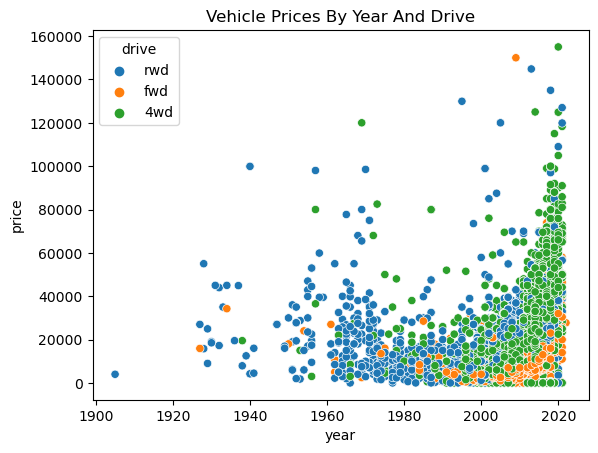

In [131]:
chart = sns.scatterplot(x='year',y='price',hue ='drive', data=vehicles_cleansed).set(title='Vehicle Prices By Year And Drive')


The figure entitled "Vehicle Prices By Year And Fuel Type" depicts vehicle prices by year. Each colored dot represents a vehicle with a different fuel type.  The green dots represent vehicles that use diesel fuel.  As you can see vehicles that use diesel fuel are generally priced higher than vehicles who use other fuel types.

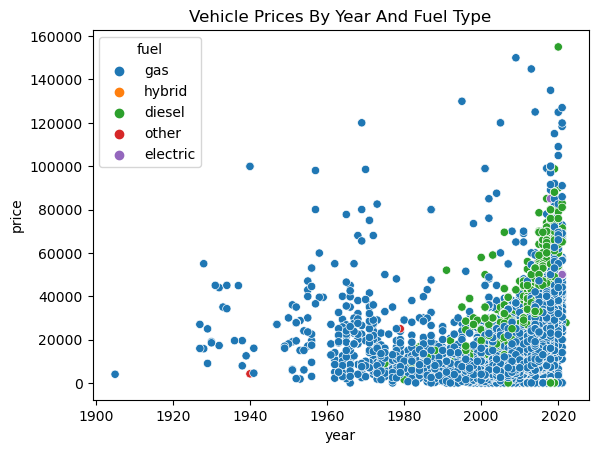

In [132]:
chart = sns.scatterplot(x='year',y='price',hue ='fuel', data=vehicles_cleansed).set(title='Vehicle Prices By Year And Fuel Type')
